Train a deep neural network on the MNIST(with 28x28 images with digits(0,1,2….9)) dataset to perform a classification task and see if you can get over 98% accuracy. Remember that this is not a binary classification, the dataset has 10 classes.

Plot the learning curves (training accuracy vs epoch and test accuracy vs epoch).

The dataset is available in Tensorflow and PyTorch. You can find the usage in the links below:

https://pytorch.org/vision/stable/datasets.html#mnist

https://keras.io/api/datasets/mnist/#load_data-function

In [79]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# get training and test sets
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [81]:
# Build model
model = keras.Sequential([
    keras.layers.Input(shape=(28,28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [82]:
# Train model
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=100,epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2666 - loss: 6.6580 - val_accuracy: 0.5159 - val_loss: 1.3905
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4696 - loss: 1.4916 - val_accuracy: 0.8062 - val_loss: 0.6830
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6118 - loss: 1.0942 - val_accuracy: 0.8767 - val_loss: 0.4551
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6890 - loss: 0.8813 - val_accuracy: 0.9230 - val_loss: 0.2984
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7836 - loss: 0.6485 - val_accuracy: 0.9449 - val_loss: 0.2426
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8467 - loss: 0.4881 - val_accuracy: 0.9534 - val_loss: 0.2113
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8772 - loss: 0.3901 - val_accuracy: 0.9485 - val_loss: 0.2348
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9042 - loss: 0.3401 - val_accu

In [83]:
# Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.2183
Test accuracy:  0.9733999967575073


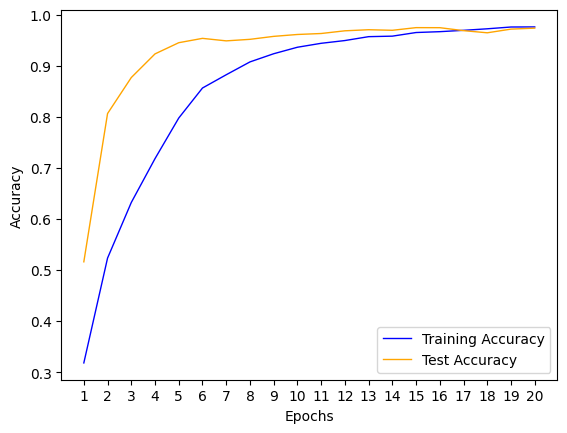

In [84]:
# Plot training and test accuracy vs epochs
plt.plot(list(range(1,21)), history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=1)
plt.plot(list(range(1,21)), history.history["val_accuracy"], label="Test Accuracy", color="orange", linewidth=1)
plt.xlabel("Epochs")
plt.xticks(list(range(1,21)))
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [85]:
# Build model using CNN
model = keras.Sequential([
    keras.layers.Input(shape=(28,28, 1)),
    keras.layers.Conv2D(32, kernel_size=(4,4), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [86]:
# Train model
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=150,epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.7767 - loss: 7.4626 - val_accuracy: 0.9676 - val_loss: 0.1365
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.9374 - loss: 0.2478 - val_accuracy: 0.9751 - val_loss: 0.0930
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9556 - loss: 0.1493 - val_accuracy: 0.9769 - val_loss: 0.0835
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9633 - loss: 0.1201 - val_accuracy: 0.9781 - val_loss: 0.0697
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.9653 - loss: 0.1092 - val_accuracy: 0.9788 - val_loss: 0.0722
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9712 - loss: 0.0940 - val_accuracy: 0.9820 - val_loss: 0.0635
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9711 - loss: 0.0888 - val_accuracy: 0.9808 - val_loss: 0.0726
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9739 - loss: 0.0830 - 

In [87]:
# Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9809 - loss: 0.0730
Test accuracy:  0.9828000068664551


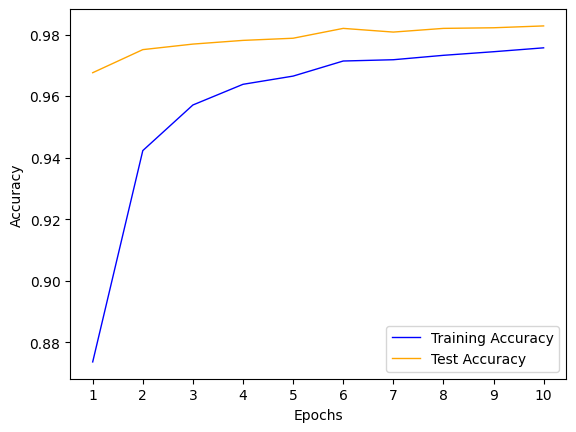

In [88]:
# Plot training and test accuracy vs epochs
plt.plot(list(range(1,11)), history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=1)
plt.plot(list(range(1,11)), history.history["val_accuracy"], label="Test Accuracy", color="orange", linewidth=1)
plt.xlabel("Epochs")
plt.xticks(list(range(1,11)))
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Using just a FNN, the accuracy is 97.3% in the testing set but many hyperparameters were tried including: number of hidden layers (1 to 3), number of neurons per hiddent layer (15 - 500), the optimizer type (adam or sgd), dropout and no dropout, and activation functions (sigmoid or relu). FNN also started to overfit towards the end of training.

Using a CNN, the test accuracy is 98.3%. I have tried just a few hyperparameters and I got past the 98% threshold with just 10 epochs. The training took way longer, though (6min compared to 2min).